### Code to extract and plot spectra from a single NEON AOP pixel
Geraldine Klarenberg   
10 July 2018   
gklarenberg@ufl.edu

Goal is to extract a single pixel from a hyperspectral hdf5 file and plot 3 figures, both without removing the bad bands of unusable dat and with those bands. We also want to export a csv of the cleaned wavelength and reflectance infor for use later.

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy
import IPython
%matplotlib inline

Get the file you need. Using `..` takes you up 2 levels to access that data outside our working directory.

In [2]:
refl_filename = ('../data/NEON_D17_SJER_DP1_20180401_184649_reflectance.h5')

In [3]:
refl_filename

'../data/NEON_D17_SJER_DP1_20180401_184649_reflectance.h5'

In [4]:
pixel_to_plot = (100,100)
pixel_to_plot

(100, 100)

Read in reflectance hdf5 file

In [5]:
hdf5_file = h5py.File(refl_filename, 'r')
hdf5_file

<HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>

Get the file name

In [6]:
file_attrs_string = str(list(hdf5_file.items()))

In [9]:
file_attrs_string

'[(\'SJER\', <HDF5 group "/SJER" (1 members)>)]'

In [11]:
list(hdf5_file.items())

[('SJER', <HDF5 group "/SJER" (1 members)>)]

In [12]:
file_attrs_string_split = file_attrs_string.split("'")
file_attrs_string_split

['[(', 'SJER', ', <HDF5 group "/SJER" (1 members)>)]']

In [13]:
sitename = file_attrs_string_split[1]
sitename

'SJER'

The above code takes the sitename from the filename so it can be used in the rest of the code. This way the code is dynamic and can be used for other sites as well.  
Now extract the reflectance.

In [14]:
refl = hdf5_file[sitename]['Reflectance']
refl

<HDF5 group "/SJER/Reflectance" (2 members)>

In [15]:
list(refl.attrs)

['Description',
 'Sensor',
 'PayloadID',
 'Scripts',
 'Acquisition_Time',
 'Band_Window_1_Nanometers',
 'Band_Window_2_Nanometers']

In [16]:
reflData = refl['Reflectance_Data']
reflData

<HDF5 dataset "Reflectance_Data": shape (216, 699, 426), type "<i2">

In [20]:
reflRaw = refl['Reflectance_Data'].value #reflData.value also works
reflRaw

array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -99

Create a dictionary containing relevant metadata information. Make an empty dictionary first.

In [21]:
metadata = {}
metadata

{}

In [22]:
type(metadata)

dict

Store the map info into a key of the same name

In [23]:
metadata['map_info'] = refl['Metadata']['Coordinate_System']['Map_Info'].value
metadata

{'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0'}

Store the wavelength info into a key with the same name

In [24]:
metadata['wavelength'] = refl['Metadata']['Spectral_Data']['Wavelength'].value
metadata

{'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
         656.941101,  661.951416,  666.

Extract no data values and store into a dictionary

In [25]:
metadata['data_ignore_value'] = float(reflData.attrs['Data_Ignore_Value'])
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
        

### NB you can go into HDF5 Viewer to look at the attributes etc that are available with the data. And eg also what the different numbers are that you get from `map_Info`

Extract the scale factor and store into dict

In [26]:
metadata['reflectance_scale_factor'] = float(reflData.attrs['Scale_Factor'])
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'reflectance_scale_factor': 10000.0,
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.9102

Apply the no data value.   
Convert the raw reflectance into type floats (was integers, see above)

In [27]:
reflClean = reflRaw.astype(float)
reflClean

array([[[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-99

Capture the shape of this raw data

In [28]:
arr_size = reflClean.shape
arr_size

(216, 699, 426)

Calculate how much of this data has 'no data'. Check for this and calculate. Use a numpy function to count the number of values that are the same as our `data_ignore_value` in our dictionary `metadata`. Because we are using it this way, instead of just referring to `-9999`, this is dynamic code. Whatever the symbol is for no data will be used.

In [29]:
number_of_values_where_no_data = np.count_nonzero(reflClean == metadata['data_ignore_value'])

In [30]:
number_of_values_where_no_data

31535502

In [31]:
total_number_of_value_in_array = (arr_size[0] * arr_size[1] * arr_size[2])
total_number_of_value_in_array

64319184

Calculate how much missing data. No result here means that it's all clean

In [32]:
if metadata['data_ignore_value'] in reflRaw:
    # print percentage missing data, rounded to 1 decimal
    print('% of points with No Data',
         np.round(number_of_values_where_no_data*100 / total_number_of_value_in_array, 1))
    
    # replace these values with NaN
    nodata_ind = np.where(reflClean == metadata['data_ignore_value'])
    reflClean[nodata_ind] = np.nan

% of points with No Data 49.0


Apply the scale factor

In [33]:
reflArray = reflClean / metadata['reflectance_scale_factor']
reflArray

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

Extract the spatial extent from attributes

In [35]:
metadata['spatial_extent'] = reflData.attrs['Spatial_Extent_meters']
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'reflectance_scale_factor': 10000.0,
 'spatial_extent': array([ 254192.,  254891., 4102667., 4102883.]),
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  

Extract bad band windows

In [37]:
metadata['bad_band_window1'] = (refl.attrs['Band_Window_1_Nanometers'])
metadata['bad_band_window1']

array([1340, 1445], dtype=int32)

In [38]:
metadata['bad_band_window2'] = (refl.attrs['Band_Window_2_Nanometers'])
metadata['bad_band_window2']

array([1790, 1955], dtype=int32)

Extract projection information

In [41]:
metadata['epsg'] = int(refl['Metadata']['Coordinate_System']['EPSG Code'].value)
metadata['epsg']

32611

Extract map information: spatial extent & resolution (pixel size)

In [42]:
mapInfo = refl['Metadata']['Coordinate_System']['Map_Info'].value
mapInfo

b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0'

In [43]:
hdf5_file.close

<bound method File.close of <HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>>

After closing the file, continue with the rest of the analysis.   
Start with a new empty pandas data frame

In [45]:
serc_pixel_df = pd.DataFrame()

Add a column of reflectance data from the cleaned reflectance array. Use `pixel_to_plot`, defined at the top of the script to define the pixel.

In [46]:
serc_pixel_df['reflectance'] = reflArray[pixel_to_plot[0], pixel_to_plot[1], :]

In [47]:
serc_pixel_df['wavelengths'] = metadata['wavelength']

In [49]:
serc_pixel_df.head(10)

,reflectance,wavelengths
0,0.0233,381.375793
1,0.0326,386.385986
2,0.0337,391.396301
3,0.0359,396.406586
4,0.0347,401.416901
5,0.0342,406.427185
6,0.0352,411.437408
7,0.0349,416.447693
8,0.0360,421.458008
9,0.0360,426.468292


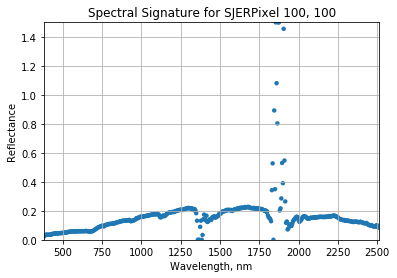

In [59]:
# pandas has a plot mechanism
serc_pixel_df.plot(x = 'wavelengths',
                  y = 'reflectance',
                  kind = 'scatter',
                  edgecolor = 'none')
# the title is dynamic: if you loop over several pixels, it will give unique titles, + strings it all together
plt.title('Spectral Signature for '+sitename+'Pixel '+', '.join(map(str, pixel_to_plot)))
ax = plt.gca() # gca is short for get current axes
ax.set_xlim([np.min(serc_pixel_df['wavelengths']),
            np.max(serc_pixel_df['wavelengths'])])
ax.set_ylim([np.min(serc_pixel_df['reflectance']),
            np.max(serc_pixel_df['reflectance'])])
ax.set_xlabel("Wavelength, nm")
ax.set_ylabel("Reflectance")

ax.grid(True)

fig = ax.get_figure()
fig.savefig('outputs/figs/'+sitename+'_plot1.png')

Text(0.5,1,'Spectral Signature for SJER Pixel 100, 100')

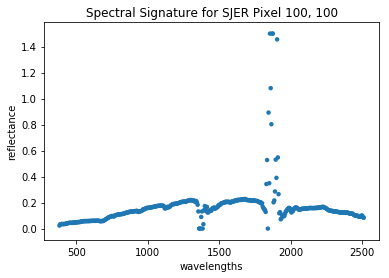

In [60]:
serc_pixel_df.plot(x = 'wavelengths',
                  y = 'reflectance',
                  kind = 'scatter',
                  edgecolor = 'none')
# the title is dynamic: if you loop over several pixels, it will give unique titles, + strings it all together
plt.title('Spectral Signature for '+sitename+' Pixel '+', '.join(map(str, pixel_to_plot)))

In [67]:
bbw1 = metadata['bad_band_window1']
print('Bad Band Window 1:', bbw1)

Bad Band Window 1: [1340 1445]


In [68]:
bbw2 = metadata['bad_band_window2']
print('Bad Band Window 2:', bbw1)

Bad Band Window 2: [1340 1445]


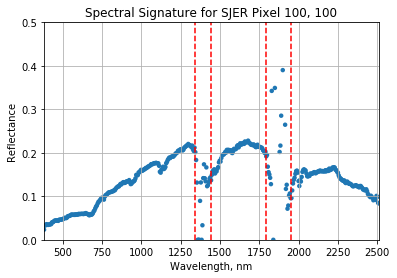

In [69]:
# make a plot with the bad regions plotted
serc_pixel_df.plot(x='wavelengths',
                   y='reflectance',
                   kind='scatter',
                   edgecolor='none')

plt.title('Spectral Signature for '+sitename+' Pixel '+', '.join(map(str, pixel_to_plot)))

ax1 = plt.gca()
ax1.grid(True)

ax1.set_xlim([np.min(serc_pixel_df['wavelengths']),
              np.max(serc_pixel_df['wavelengths'])])

ax1.set_ylim(0,0.5)

ax1.set_xlabel("Wavelength, nm")
ax1.set_ylabel("Reflectance")

# Add in red dotted lines to show boundaries of bad band windows:
ax1.plot((bbw1[0], bbw1[0]), (0,1.5), 'r--')
ax1.plot((bbw1[1], bbw1[1]), (0,1.5), 'r--')
ax1.plot((bbw2[0], bbw2[0]), (0,1.5), 'r--')
ax1.plot((bbw2[1], bbw2[1]), (0,1.5), 'r--')

fig = ax1.get_figure()
fig.savefig('outputs/figs/'+sitename+'_plot2.png')

In [70]:
# make a copy to deal with the mutable data type
from copy import copy
w = copy(metadata['wavelength'])

# can also use bbw1[0] or bbw1[1] to avoid hard-coding in
w[((w >= 1340) & (w <= 1445)) | ((w >= 1790) & (w <= 1955))] = np.nan 

# the last 10 bands sometimes have noise - best to eliminate
w[-10:] = np.nan

# optionally print wavelength values to show that -9999 values are replaced with nan
w

array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
        406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
        431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
        456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
        481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
        506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
        531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
        556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
        581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
        606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
        631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
        656.941101,  661.951416,  666.961609,  671.971924,  676.982178,
        681.992493,  687.002808,  692.013   ,  697.023315,  702.03363 ,
        707.043884,  712.054199,  717.064392,  722.074707,  727.

In [72]:
serc_pixel_df['wavelengths'] = w
serc_pixel_df.head(5)

,reflectance,wavelengths
0,0.0233,381.375793
1,0.0326,386.385986
2,0.0337,391.396301
3,0.0359,396.406586
4,0.0347,401.416901


In [73]:
serc_pixel_df.to_csv('outputs/csv/'+sitename+'.csv')